In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0


In [ ]:
!wget https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/mmm.py

--2024-04-29 19:04:18--  https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/mmm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘mmm.py.1’

mmm.py.1            100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-29 19:04:18 (93.2 MB/s) - ‘mmm.py.1’ saved [10246/10246]



In [ ]:
from mmm import plot_loss_curves, walk_through_dir,create_tensorboard_callback,compare_historys

In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers
from mmm import plot_loss_curves, walk_through_dir,create_tensorboard_callback,compare_historys

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mo2m1nghareeb","key":"3961a956800687fc3931466c89f146ec"}'}

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

100% 570M/572M [00:05<00:00, 90.8MB/s]
100% 572M/572M [00:05<00:00, 104MB/s] 


In [ ]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.


In [ ]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['person438_virus_889.jpeg']
image shape (786, 1310)


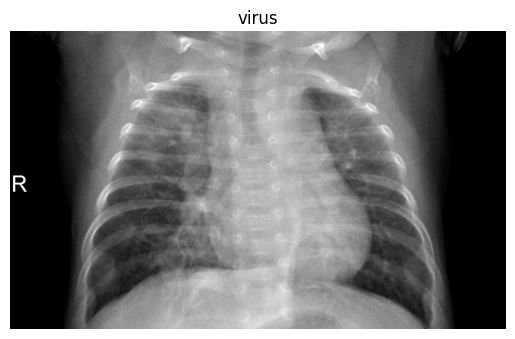

In [ ]:
img = view_image("/content/COVID_IEEE/","virus")

['NORMAL2-IM-0777-0001.jpeg']
image shape (1407, 1522)


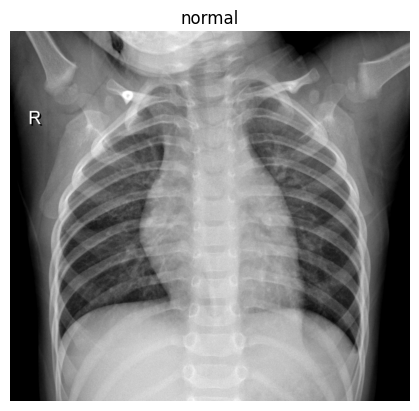

In [ ]:
img = view_image("/content/COVID_IEEE/","normal")

['covid1900398.png']
image shape (480, 640, 3)


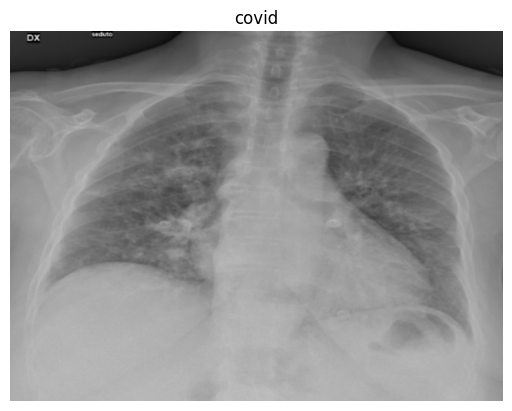

In [ ]:
img = view_image("/content/COVID_IEEE/","covid")

In [ ]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [ ]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
!wget https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/mmm.py


--2024-04-29 19:03:49--  https://raw.githubusercontent.com/moamen1358/helper_functions_moamen/main/mmm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘mmm.py’

mmm.py              100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-29 19:03:49 (39.8 MB/s) - ‘mmm.py’ saved [10246/10246]



In [ ]:
walk_through_dir('/content/COVID_IEEE')

There are 3 directories and 0 images in '/content/COVID_IEEE'.
There are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
There are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
There are 0 directories and 668 images in '/content/COVID_IEEE/normal'.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dense, Flatten

base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights="imagenet", include_top=False)

for layer in base_model.layers:
    layer.trainable = False
# '''''''''''''''''''''''''''''''''''''''''''''''''

aug_layer = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(factor=0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.GaussianNoise(0.1)
])
# ///////////////////////////////////////////////////
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
model_aug = base_model(inputs)
model_aug = aug_layer(model_aug)
model_aug = Flatten()(model_aug)

model_aug = Dense(units=1024, activation="relu")(model_aug)
model_aug = Dense(units=512, activation="relu")(model_aug)
model_aug = Dense(units=256, activation="relu")(model_aug)

prediction_layer = Dense(units=3, activation="softmax")(model_aug)
model_aug = Model(inputs=inputs, outputs=prediction_layer)
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming X_train and y_train are your training data
history_covid_no_train = model_aug.fit(X_train,
              y_train,
              validation_split=0.2,
              batch_size=32,
              epochs=20,
              callbacks=[create_tensorboard_callback("transfer_learning", "covid")])



Saving TensorBoard log files to: transfer_learning/covid/20240429-190505
Epoch 1/2
15/37 [===========>..................] - ETA: 1:01 - loss: 20.8694 - accuracy: 0.5312

KeyboardInterrupt: 

In [ ]:
eva1 = model_aug.evaluate(X_test,y_test)
eva1

In [ ]:
acc = round(eva1[1], 2)
model_aug.save(f'covid_acc_{acc}.keras')


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
  layer.trainable = False



In [ ]:
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
for layer in model_aug.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> True
<Functional name=mobilenet_1.00_224, built=True> True
<Sequential name=sequential, built=True> True
<Flatten name=flatten, built=True> True
<Dense name=dense, built=True> True
<Dense name=dense_1, built=True> True
<Dense name=dense_2, built=True> True
<Dense name=dense_3, built=True> True


In [ ]:
for layer in base_model.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> False
<Conv2D name=conv1, built=True> False
<BatchNormalization name=conv1_bn, built=True> False
<ReLU name=conv1_relu, built=True> False
<DepthwiseConv2D name=conv_dw_1, built=True> False
<BatchNormalization name=conv_dw_1_bn, built=True> False
<ReLU name=conv_dw_1_relu, built=True> False
<Conv2D name=conv_pw_1, built=True> False
<BatchNormalization name=conv_pw_1_bn, built=True> False
<ReLU name=conv_pw_1_relu, built=True> False
<ZeroPadding2D name=conv_pad_2, built=True> False
<DepthwiseConv2D name=conv_dw_2, built=True> False
<BatchNormalization name=conv_dw_2_bn, built=True> False
<ReLU name=conv_dw_2_relu, built=True> False
<Conv2D name=conv_pw_2, built=True> False
<BatchNormalization name=conv_pw_2_bn, built=True> False
<ReLU name=conv_pw_2_relu, built=True> False
<DepthwiseConv2D name=conv_dw_3, built=True> False
<BatchNormalization name=conv_dw_3_bn, built=True> False
<ReLU name=conv_dw_3_relu, built=True> False
<Conv2D name=conv_pw_3,

In [ ]:
history_covid_train = model_aug.fit(X_train,
                                    y_train,
                                    validation_split=0.2,
                                    batch_size=32,
                                    epochs=40,
                                    initial_epoch=history_covid_no_train.epoch[-1],
                                    callbacks=[create_tensorboard_callback("transfer_learning", "covid")])




Saving TensorBoard log files to: transfer_learning/covid/20240428-170820
Epoch 20/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.8212 - loss: 2.0727 - val_accuracy: 0.6267 - val_loss: 3.4597
Epoch 21/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9596 - loss: 0.2020 - val_accuracy: 0.5890 - val_loss: 7.5023
Epoch 22/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9396 - loss: 0.2583 - val_accuracy: 0.9247 - val_loss: 0.4495
Epoch 23/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9822 - loss: 0.0754 - val_accuracy: 0.9007 - val_loss: 0.6044
Epoch 24/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9873 - loss: 0.0368 - val_accuracy: 0.7603 - val_loss: 5.6294
Epoch 25/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9403 - loss: 0.7250 - val_accuracy: 0.6267 - val_loss: 13.0121
Epoch 26/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.9507 - loss: 0.3825 - val_accuracy: 0.8904 - val_loss: 0.5031
Epoch 27/40
37/37 ━━━━

In [ ]:
eva2 = model_aug.evaluate(X_test,y_test)
eva2

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9644 - loss: 0.4004


[0.36153146624565125, 0.9643835425376892]

In [ ]:
acc = round(eva2[1], 2)
model_aug.save(f'covid_acc_{acc}.keras')

In [ ]:
base_model.trainable = True


for layer in base_model.layers[:-10]:
    layer.trainable = False


In [ ]:
model_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
for layer in base_model.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> False
<Conv2D name=conv1, built=True> False
<BatchNormalization name=conv1_bn, built=True> False
<ReLU name=conv1_relu, built=True> False
<DepthwiseConv2D name=conv_dw_1, built=True> False
<BatchNormalization name=conv_dw_1_bn, built=True> False
<ReLU name=conv_dw_1_relu, built=True> False
<Conv2D name=conv_pw_1, built=True> False
<BatchNormalization name=conv_pw_1_bn, built=True> False
<ReLU name=conv_pw_1_relu, built=True> False
<ZeroPadding2D name=conv_pad_2, built=True> False
<DepthwiseConv2D name=conv_dw_2, built=True> False
<BatchNormalization name=conv_dw_2_bn, built=True> False
<ReLU name=conv_dw_2_relu, built=True> False
<Conv2D name=conv_pw_2, built=True> False
<BatchNormalization name=conv_pw_2_bn, built=True> False
<ReLU name=conv_pw_2_relu, built=True> False
<DepthwiseConv2D name=conv_dw_3, built=True> False
<BatchNormalization name=conv_dw_3_bn, built=True> False
<ReLU name=conv_dw_3_relu, built=True> False
<Conv2D name=conv_pw_3,

In [ ]:
history_covid_train_5 = model_aug.fit(X_train,
                                      y_train,
                                      validation_split=0.2,
                                      batch_size=32,
                                      epochs=60,
                                      initial_epoch=history_covid_train.epoch[-1],
                                      callbacks=[create_tensorboard_callback("transfer_learning", "covid")])



Saving TensorBoard log files to: transfer_learning/covid/20240428-171048
Epoch 40/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.9891 - loss: 0.0963 - val_accuracy: 0.9349 - val_loss: 0.4169
Epoch 41/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - accuracy: 0.9846 - loss: 0.0844 - val_accuracy: 0.9349 - val_loss: 0.2035
Epoch 42/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.9889 - loss: 0.0415 - val_accuracy: 0.9555 - val_loss: 0.2597
Epoch 43/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.9977 - loss: 0.0056 - val_accuracy: 0.9623 - val_loss: 0.6102
Epoch 44/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9985 - loss: 0.0257 - val_accuracy: 0.9247 - val_loss: 1.0755
Epoch 45/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9904 - loss: 0.0392 - val_accuracy: 0.9692 - val_loss: 0.4837
Epoch 46/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9959 - loss: 0.0103 - val_accuracy: 0.9726 - val_loss: 0.5630
Epoch 47/60
37/37 ━━━━━

In [ ]:
eva3 = model_aug.evaluate(X_test,y_test)
eva3

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9767 - loss: 0.7667


[0.6572732329368591, 0.9808219075202942]

In [ ]:
acc = round(eva3[1], 2)
model_aug.save(f'covid_acc_{acc}.keras')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save Model
model_aug.save('/content/drive/My Drive/covid_acc_98.keras')
# Unmount Google Drive (Optional)
drive.flush_and_unmount()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


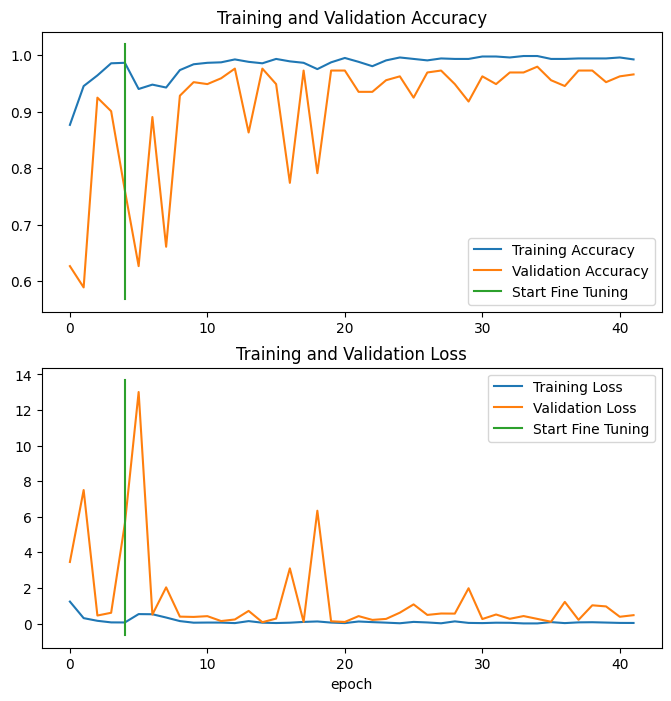

In [ ]:
compare_historys(history_covid_train,history_covid_train_5)

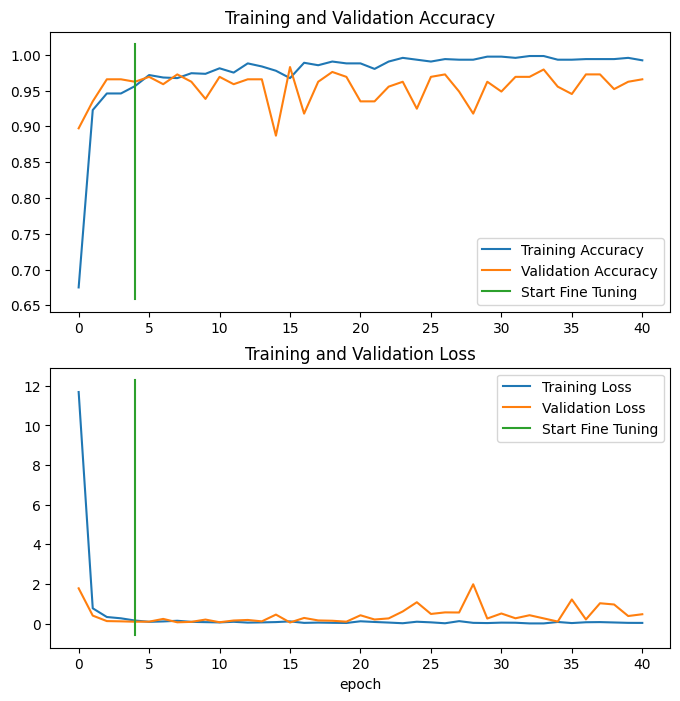

In [ ]:
compare_historys(history_covid_no_train,history_covid_train_5)